In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

%matplotlib inline

In [5]:
housing = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header = None, sep = '\s+')

In [6]:
housing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Rename Columns header

#  Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN   proportion of residential land zoned for lots over 25,00sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS   Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [7]:
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'MEDV']

In [8]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Visualizing the important characteristics of the dataset

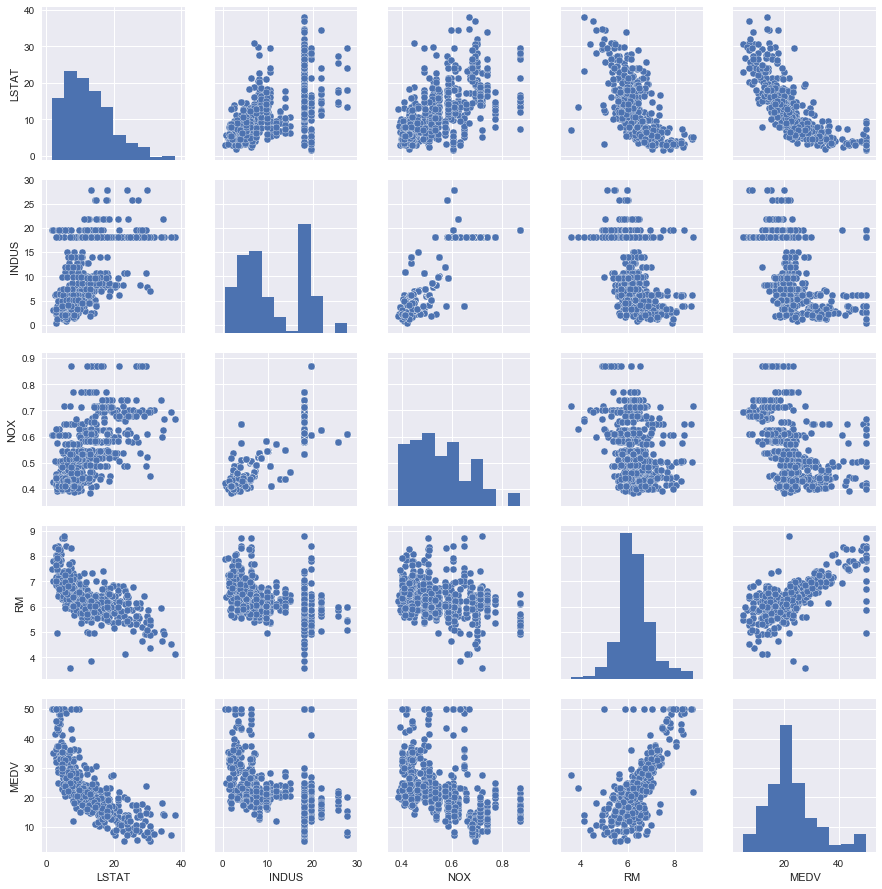

In [9]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
housing_subset = housing[cols]
sns.pairplot(housing_subset)
plt.show()

# To check correlations in our data

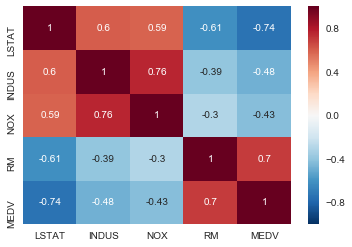

In [10]:
cm = np.corrcoef(housing_subset.values.T)
hm = sns.heatmap(cm, annot=True, yticklabels = cols, xticklabels = cols)
plt.show()

# Estimating the coefficient of a regression model via scikit-learn

In [12]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [13]:
X = housing[['RM']]
y = housing[['MEDV']]

In [14]:
# Fit model

slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


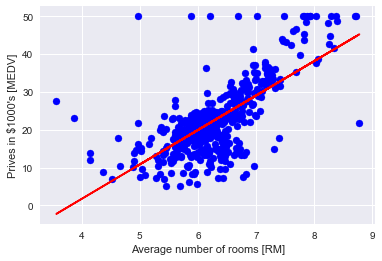

In [16]:
plt.scatter(X, y , c = 'blue')
plt.plot(X, slr.predict(X), color = 'red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prives in $1000\'s [MEDV]')
plt.show()

# Evaluating the performance of linear regression models

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

/Users/Bolito/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
X = housing[['RM']].values
y = housing[['MEDV']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Residual plot

The difference between the true value of  Y  and the predicted value of  Y  (denoted  Ŷ)

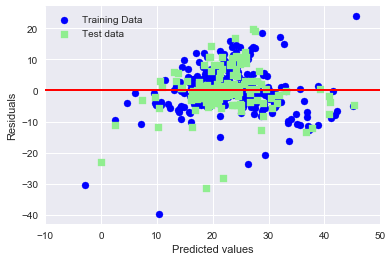

In [23]:
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training Data')
plt.scatter(y_test_pred, y_test_pred-y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

# Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error

In [26]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE train %.3f, test %.3f' % (mse_train, mse_test))

MSE train 42.158, test 47.033


# Coefficient of Determination (R2)

In [28]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R^2 train: %.3f, test: %.3f' % (r2_train, r2_test))

R^2 train: 0.503, test: 0.435


# Nonlinear Relationships

In [29]:
from sklearn.preprocessing import PolynomialFeatures
X = housing[['LSTAT']].values
y = housing[['MEDV']].values
regr = LinearRegression()

In [30]:
# create polynomial features
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [31]:
# linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [34]:
# quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [32]:
# cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

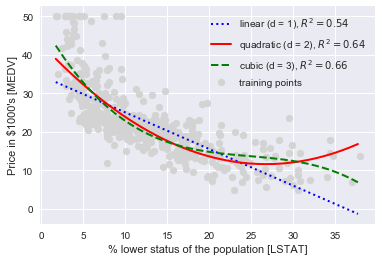

In [35]:
# plot results
plt.scatter(X, y, label = 'training points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'linear (d = 1), $R^2=%.2f$' % linear_r2, color = 'blue', lw = 2, linestyle = ':')
plt.plot(X_fit, y_quad_fit, label = 'quadratic (d = 2), $R^2=%.2f$' % quadratic_r2, color = 'red', lw = 2, linestyle = '-')
plt.plot(X_fit, y_cubic_fit, label = 'cubic (d = 3), $R^2=%.2f$' % cubic_r2, color = 'green', lw = 2, linestyle = '--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc = 'upper right')
plt.show()

# Transform Features

In [36]:
# transform featurs
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [37]:
# fit features
X_fit = np.arange(X_log.min()-1,X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

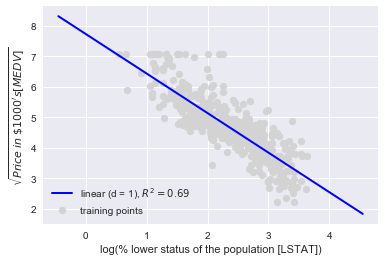

In [38]:
# plot results
plt.scatter(X_log, y_sqrt, label = 'training points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'linear (d = 1), $R^2=%.2f$' % linear_r2, color = 'blue', lw = 2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc = 'lower left')
plt.show()